In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [75]:
df=pd.read_csv(r"C:\Users\jumde\Downloads\titanic.csv")

In [76]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [77]:
new_df=df.drop(["Name","SibSp","Parch","Ticket","Cabin","Embarked","Pclass"],axis=1)
new_df.head(3)

,PassengerId,Survived,Sex,Age,Fare
0,1,0,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,1,female,26.0,7.9250


In [78]:
new_df["Sex"]=new_df["Sex"].map({"male":0,"female":1})
new_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [79]:
features=new_df[["Sex","Age","Fare","PassengerId"]]
label=new_df["Survived"]

In [80]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)

In [90]:
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
s=model.score(features,label)
predict=model.predict(x_test)
s*100

80.24691358024691

In [92]:
new_predict=model.predict([[0,22,7.25,1]])
new_predict

C:\Users\jumde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

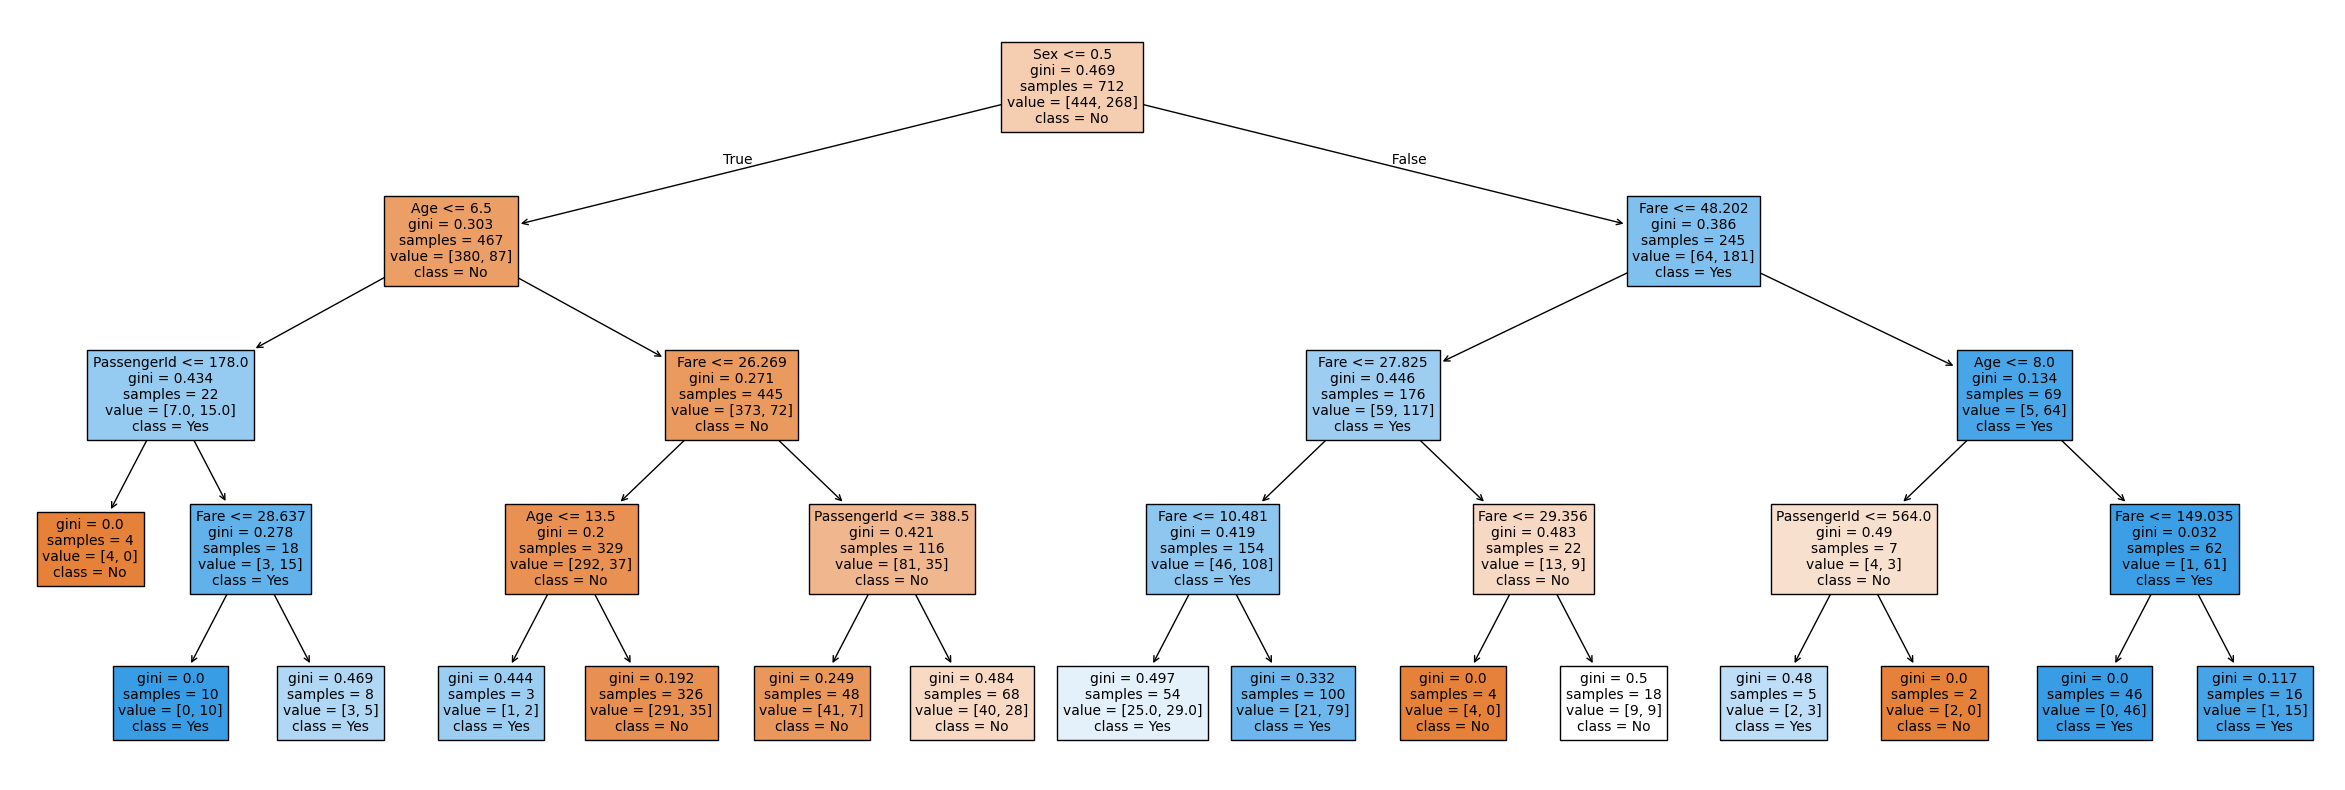

In [97]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plot_tree(model, feature_names=["Sex", "Age","Fare","PassengerId"], class_names=["No", "Yes"],filled=True,fontsize=10 )
plt.show()
